<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/10%EA%B0%95_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#컨볼루션 필터 :인간의 시각적 특성을 고려한 필터.
#인간의 시각 정보 체계를 신경망에서 반영하고 있지 않음.
#왜냐하면 이 때까지는 각 변수가 독립적이라고 생각. 하지만 위치 정보가 바뀌면 기하학적 구조도 변환
#주변 특징 정보를 포함한 표현 혹은 인코딩 방법이 필요함.
#특징 간 위치 정보를 나타내는 데이터를 인코딩 할 때는 주변 정보값을 포함해 구분할 수 있어야 함.
#방법 1. 주변 정보를 데이터로 추가해 특징 차원을 증가.
#이 경우 특징의 수가 증가하면 신경망의 크기가 증가하고
#최적화된 학습 결과를 얻기 어렵고, 충분한 양의 데이터 확보에 어려움이 발생함.
#이를 해결하기 위해서, 주변 정보의 평균을 계산해서 크기를 줄임.
#정보를 잃긴 하지만, 특징의 수를 유지하면서 같은 밝기 값을 갖는데 주변의 밝기 정보에 따라 값이 다르게 나옴.
#상화좌우를 평균할 수도 있고, 위 아래 값과 함께 평균할 수도 있음
#어떤 주변 정보를 어떻게 계산할지는 응용 분야와 데이터 특성에 따라 다름.
#한개의 특징의 주변 정보를 표현하기 위해 뺄셈 연산을 수행할 수도 있음.
#위 셀 값에서 아래셀 값을 빼서, 양수가 나오면 위가 밝은 것 음수면 아래가 밝은것 -> 수직 방향의 밝기 변화 파악 가능.

#컨볼루션: 주변 정보를 인코딩 하는 것.
#컨볼루션 필터: 어떤 주변 정보를 어느 정도 반영할 지를 결정하는 데 사용하는 행렬.
#입력 화소와 그 화소의 위치에 해당하는 컨볼루션 필터의 값(가중치)를 곱한 뒤 모두 더한 합을 출력 화소로 생성.
#다수의 필터를 정의해 입력 영상의 기하학적 특징을 파악할 수 있음.
#실제 컨볼루션 신경망에서는 학습 데이터를 통해서 필터를 만듬.
#평균 컨볼루션 필터를 사용 -> 블러링된 뿌연 영상이 나옴., 주변의 튀는 점들을 제거(노이즈 제거)
#edge 컨볼루션 필터를 사용 -> 수평 및 수직 엣지(모서리 부분) 검출에 유용
#sharpening 컨볼루션 필터를 사용 -> 밝기 변화가 발생하는 경계 영역에서 값이 커짐.

#컨볼루션 필터 설계의 어려움:
#이미지는 촬영 상황에 따라서 위치, 크기 및 밝기가 변함.
#영상의 크기에 반응할 수 있는 다양한 크기의 필터가 필요.
#사물이 회전할 수도 있으므로 각도 변화에 강인한 필터가 필요.
#주변 조명에 따라 영상이 영향 받을 수 있음, 위치도 변할 수 있음
#다양한 기하학적 변화가 있어서 컨볼루션 필터를 설계하는 것은 매우 어려움.
#filter bank= 다수의 컨볼루션 필터를 저장한 곳.
#filter bank를 사용해 영상의 크기와 변화 다양하게 대응할 수 있지만
#필터의 수가 늘어나면 크기와 방향 계산량이 커져서 학습이 느려지고 분석이 어려워짐.
#컨볼루션 신경망 : 학습을 통해 필터를 설계함

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image #이미지 이용을 위해서

%matplotlib inline

sess = tf.Session()

In [0]:
#1차원 데이터에 1개의 필터연산 적용.

i = tf.constant([1, 0, 2, 3, 0, 1, 1], dtype=tf.float32) #float 타입의 1차원 데이터
f = tf.constant([2, 1], dtype=tf.float32) #float타입의 1차원 필터


data   = tf.reshape(i, [1, 7, 1])   #1차원 데이터에 필터연산을 하기 위해서 3차원 필터(행,열, 깊이)로 변환.
#행 = 데이터의 개수 1, 열 = 데이터의 길이 7 깊이 = 1 (입력 데이터의 채널이 한개이기 때문에)
#만약 영상의 경우 rgb 삼색을 사용하면 채널 = 3, 흑백이면 채널 = 1
filter = tf.reshape(f, [2, 1, 1])   #행 = 필터의 크기 2, 열 = 1(입력 데이터의 채널이 한개이기 때문에)
#깊이 = 필터의 개수 1

#데이터와 필터를 가지고 텐서플로에서 제공하는 conv1d함수로 필터링을 수행.
conv = tf.nn.conv1d(data, filter, 1, padding='VALID')  
#conv1d(data, filter, stride, padding) stride = 필터 이동하는 크기.

c = sess.run(conv)
#필터링한 결과의 shape는 3차원 (input data 개수, 데이터의 길이, 깊이)
print(c.shape)

print(c[0,:,0]) #(1*2+0*1), (0*2 + 2*1)

(1, 6, 1)
[2. 2. 7. 6. 1. 3.]


In [0]:
#padding 인자를 same(원본 데이터 크기 유지)로 지정.
conv = tf.nn.conv1d(data, filter, 1, padding='SAME')  

c = sess.run(conv)
print(c.shape)
print(c[0,:,0])




(1, 7, 1)
[2. 2. 7. 6. 1. 3. 2.]


In [0]:
#하나의 1차원 데이터에 2개의 필터를 사용.
i = tf.constant([1, 0, 2, 3, 0, 1, 1], dtype=tf.float32)

f = tf.constant([[2, 1], [1,-1] ], dtype=tf.float32) #float 타입의 1차원 필터 2개 사용.

data   = tf.reshape(i, [1, 7, 1])   
filter = tf.reshape(f, [2, 1, 2])   #행 = 필터의 크기 2, 열 = 데이터의 채널 수1, 깊이 = 필터개수 2 

conv = tf.nn.conv1d(data, filter, 1, padding='SAME') 

c = sess.run(conv)
print(c.shape)

print("filter 1 결과", c[0,:,0])
print("filter 2 결과", c[0,:,1])

(1, 7, 2)
filter 1 결과 [2. 2. 7. 6. 1. 3. 2.]
filter 2 결과 [ 1. -2. -1.  3. -1.  0.  1.]


In [0]:
#3개의 1차원 데이터, 하나의 필터

i = tf.constant([[1, 0, 2, 3, 0, 1, 1], 
                 [1, 1, 1, 1, 1, 1, 1.0],
                 [2, 2, 2, 1, 1, 1, 1.0]                
                ], dtype=tf.float32)

f = tf.constant([2, 1], dtype=tf.float32)

data   = tf.reshape(i, [3, 7, 1]) 
filter = tf.reshape(f, [2, 1, 1]) 

conv = tf.nn.conv1d(data, filter, 1, padding='SAME') 

c = sess.run(conv)

print(c.shape)

print("data1  filter 결과", c[0,:,0]) #3차원 행렬 c에서 인덱스 0, 전체 특징 데이터 인덱스 0
print("data2  filter 결과", c[1,:,0])
print("data3  filter 결과", c[2,:,0])

(3, 7, 1)
data1  filter 결과 [2. 2. 7. 6. 1. 3. 2.]
data2  filter 결과 [3. 3. 3. 3. 3. 3. 2.]
data3  filter 결과 [6. 6. 5. 3. 3. 3. 2.]


In [0]:
#3개의 1차원 데이터, 필터 2개
i = tf.constant([[1, 0, 2, 3, 0, 1, 1], 
                 [1, 1, 1, 1, 1, 1, 1.0],
                 [2, 2, 2, 1, 1, 1, 1.0]                
                ], dtype=tf.float32)

f = tf.constant([[2, 1], [1,-1] ], dtype=tf.float32)

data   = tf.reshape(i, [3, 7, 1])  
filter = tf.reshape(f, [2, 1, 2])  

conv = tf.nn.conv1d(data, filter, 1, padding='SAME') 

c = sess.run(conv)
print(c.shape)

print("data1  x filter 1", c[0,:,0]) #c[1차원, 2차원 3차원]
print("data2  x filter 1", c[1,:,0])
print("data3  x filter 1", c[2,:,0])

print("data1  x filter 2", c[0,:,1])
print("data2  x filter 2", c[1,:,1])
print("data3  x filter 2", c[2,:,1])

(3, 7, 2)
data1  x filter 1 [2. 2. 7. 6. 1. 3. 2.]
data2  x filter 1 [3. 3. 3. 3. 3. 3. 2.]
data3  x filter 1 [6. 6. 5. 3. 3. 3. 2.]
data1  x filter 2 [ 1. -2. -1.  3. -1.  0.  1.]
data2  x filter 2 [0. 0. 0. 0. 0. 0. 1.]
data3  x filter 2 [0. 0. 1. 0. 0. 0. 1.]


In [0]:
#for문을 사용해 반복문 없이 반복.

i = tf.constant([[1, 0, 2, 3, 0, 1, 1], 
                 [1, 1, 1, 1, 1, 1, 1.0],
                 [2, 2, 2, 1, 1, 1, 1.0]                
                ], dtype=tf.float32)

k = tf.constant([[2, 1], [1,-1] ], dtype=tf.float32)

#각각의 다차원 배열에서 행,열, 깊이가 정확하게 주어져야 함.
for f in range(0,2) : #필터의 개수만큼 반복
    for n in range(0,3) :         #데이터의 개수만큼 반복.
        data   = tf.reshape(i[n], [1, 7, 1])   
        filter = tf.reshape(k[f], [2, 1, 1]) 

        conv = tf.nn.conv1d(data, filter, 1, padding='SAME') 

        c = sess.run(conv)
        
        print("data%d  x filter %d" % (n+1, f+1 ), c[0,:,0])
#for문을 사용하면 속도가 느려질 수 있음.

data1  x filter 1 [2. 2. 7. 6. 1. 3. 2.]
data2  x filter 1 [3. 3. 3. 3. 3. 3. 2.]
data3  x filter 1 [6. 6. 5. 3. 3. 3. 2.]
data1  x filter 2 [ 1. -2. -1.  3. -1.  0.  1.]
data2  x filter 2 [0. 0. 0. 0. 0. 0. 1.]
data3  x filter 2 [0. 0. 1. 0. 0. 0. 1.]


In [0]:
#2차원 데이터 필터링.
#1개의 2차원 데이터와 1개으 필터.
x = tf.constant([1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], shape=(4,4)) #데이터의 크기 = 4*4
#2차원 데이터를 filtering할 때는 4차원 데이터로 변환해야함.
x_image = tf.reshape(x, [1, 4,4 ,1]) #(행= 데이터의 개수 1, 열과 깊이는 데이터의 크기 4, 4, 채널 개수 1)

filter = tf.constant( #필터의 크기 = 3*3
     [ 1.0, 1.0, 1.0,
       0.0, 0.0, 0.0,
      -1.0, -1.0, -1.0], shape=(3,3,1,1)) #필터 크기 3,3 채널 개수 1, 필터 개수 1

#tensorflow의 conv2d를 이용해 필터링을 수행.
conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME') #입력영상, 필터, stride, 패딩
c = sess.run(conv)
print(c.shape)
print(c[0,:,:,0])

(1, 4, 4, 1)
[[-11. -18. -21. -15.]
 [-16. -24. -24. -16.]
 [-16. -24. -24. -16.]
 [ 19.  30.  33.  23.]]


In [0]:
#1개의 2차원 데이터와 2개의 필터
x = tf.constant([1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], shape=(4,4))
x_image = tf.reshape(x, [-1,4,4,1])    #reshape

#1차원 데이터와 달리 다수의 필터를 직접 정의할 수 없음
#필터의 크기는 1,2차원에 명시하고 4번째 차원이 필터에 대한 인덱스가 되어야하기 때문.
filter = np.zeros([3,3,1,2], dtype='float32')

filter[:,:,0,0] =  np.array([1,1,1,0,0,0,-1,-1,-1.0]).reshape(3,3) #4번째 인덱스가 0
filter[:,:,0,1] =  np.array([1./9, 1./9, 1./9,   1./9, 1./9, 1./9, 1./9, 1./9, 1./9]).reshape(3,3)

conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c = sess.run(conv)
print(c.shape) 

print("filter 1\n", c[0,:,:,0])
print("filter 2\n", c[0,:,:,1])  

(1, 4, 4, 2)
filter 1
 [[-11. -18. -21. -15.]
 [-16. -24. -24. -16.]
 [-16. -24. -24. -16.]
 [ 19.  30.  33.  23.]]
filter 2
 [[ 1.5555556  2.6666667  3.3333333  2.4444444]
 [ 3.6666667  6.         7.0000005  5.       ]
 [ 6.333333  10.000001  11.         7.666667 ]
 [ 5.111111   8.         8.666666   6.       ]]


In [0]:
#3개의 2차원 데이터, 필터 2개
x = tf.constant([
    [1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    [1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    [1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]  , shape=(4,4, 3))
x_image = tf.reshape(x, [3,4,4,1])   


filter = np.zeros([3,3,1,2], dtype='float32')
filter[:,:,0,0] =  np.array([1,1,1,0,0,0,-1,-1,-1.0]).reshape(3,3)
filter[:,:,0,1] =  np.array([1./9, 1./9, 1./9,   1./9, 1./9, 1./9, 1./9, 1./9, 1./9]).reshape(3,3)

conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c  = sess.run(conv)
print(c.shape) 

print("data1  x filter 1\n", c[0,:,:,0])
print("data3  x filter 2\n", c[2,:,:,1])
#1차원 데이터에는 3차원 배열을, 2차원 데이터에는 4차원 배열을 정의해서 컨볼루션을 수행.

(3, 4, 4, 2)
data1  x filter 1
 [[-11. -18. -21. -15.]
 [-16. -24. -24. -16.]
 [-16. -24. -24. -16.]
 [ 19.  30.  33.  23.]]
data3  x filter 2
 [[ 1.5555556  2.6666667  3.3333333  2.4444444]
 [ 3.6666667  6.         7.0000005  5.       ]
 [ 6.333333  10.000001  11.         7.666667 ]
 [ 5.111111   8.         8.666666   6.       ]]


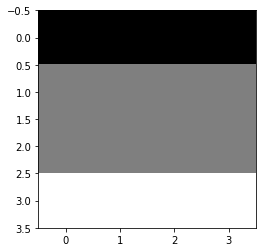

In [0]:
#실제 영상을 사용해 컨볼루션 필터 적용.
#픽셀 하나는 0~255사이의 밝기값.
#흑백 이미지 :한개의 채널만 사용
a = np.asarray( [
    [0,0,0,0], #검은색
    [127,127,127,127], #회색
    [127,127,127,127],
    [255,255,255,255],      #흰색
],dtype='uint8')

plt.imshow(a, cmap='gray')

(4, 4, 3)


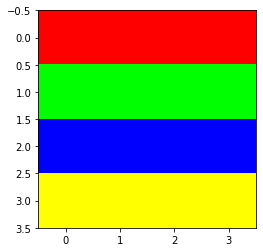

In [0]:
#칼라이미지 3개의 채널을 사용

r = np.array( [
    [255,255,255,255],
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255]
],dtype='uint8')

g = np.array( [
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],
    [255,255,255,255],    
],dtype='uint8')

b = np.array( [
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],    
],dtype='uint8' )

colors = np.dstack([r, g ,b]) #3개의 채널을 합해서 3차원으로 만듬.
print(colors.shape) #행4, 열4 깊이 3
plt.imshow(colors)

In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


(183, 275, 3)
[ 24  30 108]
[209 171 158]


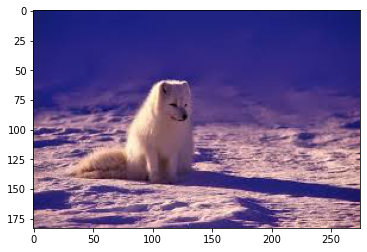

In [0]:
#pil 모듈이 제공하는 open함수를 이용해 영상을 읽어옴.
img = Image.open('/content/drive/My Drive/files/images.jpg')
data = np.array( img, dtype='uint8' ) #array 함수를 사용해 numpy객체로 변환.
print(data.shape) #행의 크기, 열의 크기 , channel(칼라여서 3)
plt.imshow(data)
print( data[0,0,:] ) #왼쪽 상단 0,0위치의 픽셀값을 출력
print( data[115,75,:] ) 

(183, 275)


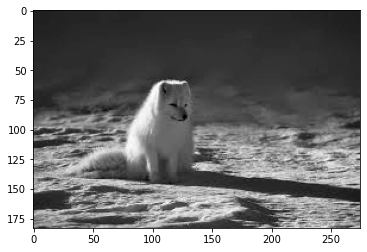

In [0]:
#convert 사용해서 칼라이미지를 흑백이미지로 변환.
gray = img.convert('L') #Lmode는 칼라 이미지를 흑백으로 변환.
data = np.array( gray, dtype='uint8' )

print(data.shape) #채널을 한개만 사용하게 됨.(생략)

plt.imshow(data, cmap='gray')

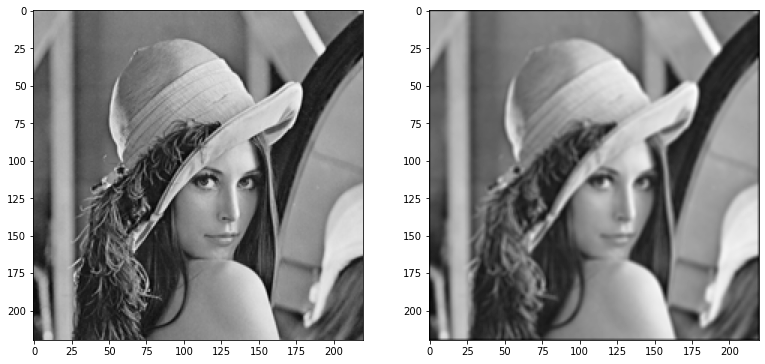

In [0]:
#실제 이미지에 컨볼루션 필터 적용.
img = Image.open('/content/drive/My Drive/files/lenna.png').convert('L') #이미지를 흑백으로 변환하여 img에 저장
data = np.array( img )#numpy 객체로 변환하여 데이터에 저장.


height = data.shape[0] #데이터 행렬의 행의 크기 (220)
width = data.shape[1] #데이터 행렬의 열의 크기 (220)

#영상데이터를 바로 4차원 데이터로 변환
x_image = tf.constant(data, dtype=tf.float32, shape=(1,height, width,1))

#filter 역시 4차원 배열로 전환. (mean 필터 사용), (필터의 크기행, 필터의 크기열, 입력 영상의 채널수, 필터의 수)
filter = tf.constant([1./9, 1./9, 1./9,
                       1./9, 1./9, 1./9, 
                       1./9, 1./9, 1./9], shape=(3,3,1,1))

#필터링 하는 식을 정의하여 conv에 저장.
conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c = sess.run(conv)  
c = c[0,:,:,0] #4차원 행렬 c에서 인덱스 0, x축 전체 특징 데이터, y축 전체 특징 데이터, 인덱스0


plt.figure(figsize=(13,13))
plt.subplot(1,2,1)
plt.imshow(data, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(c, cmap='gray')
#평균 필터를 사용했기 때문에 블러링이 됨.

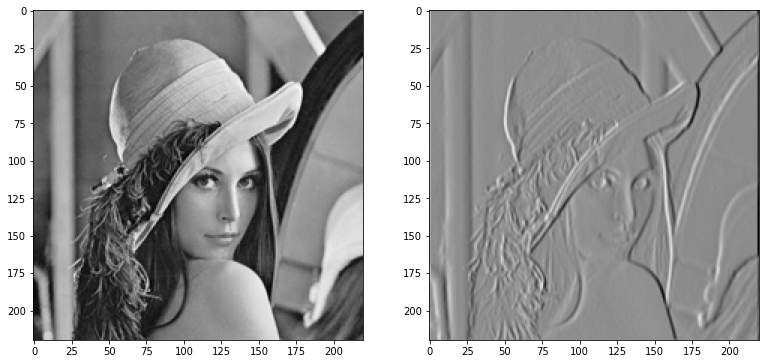

In [0]:
#수직 엣지 추출 필터.

filter = tf.constant([-1.0, 0, 1,
                       -1,0,1, 
                       -1, 0, 1], shape=(3,3,1,1)) #왼쪽은 -1, 오른쪽은 +1로 해서 수직 엣지 추출필터 만듬.
conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c = sess.run(conv)
c = c[0,:,:,0]

plt.figure(figsize=(13,13))
plt.subplot(121)
plt.imshow(data, cmap='gray')
plt.subplot(122)
plt.imshow(c, cmap='gray')
#평균 필터의 경우 평균하면 0~255범위가 나오지만, 엣지필터는 다름.

-638.0
519.0


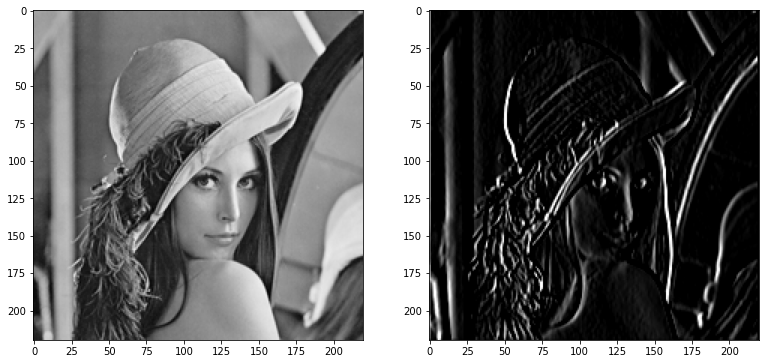

In [0]:
print(np.min(  c.flatten()  ) )
print(np.max(  c.flatten()  ) )

#클리핑 수행
c[c > 255] = 255
c[c < 0] = 0


plt.figure(figsize=(13,13))
plt.subplot(121)
plt.imshow(data, cmap='gray')
plt.subplot(122)
plt.imshow(c, cmap='gray')

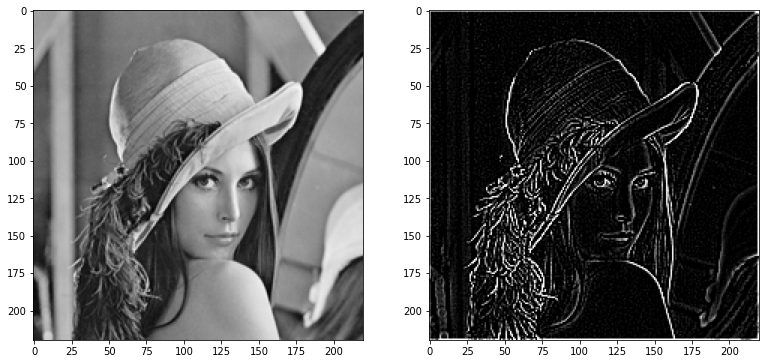

In [0]:
filter = tf.constant([-1.0,-1, -1,
                       -1,8,-1, 
                       -1,-1, -1], shape=(3,3,1,1))
conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c = sess.run(conv)
c = c[0,:,:,0]

c[c > 255] = 255
c[c < 0] = 0


plt.figure(figsize=(13,13))
plt.subplot(121)
plt.imshow(data, cmap='gray')
plt.subplot(122)
plt.imshow(c, cmap='gray')
#영상에서 외곽선 부분이 잘 추출됨.

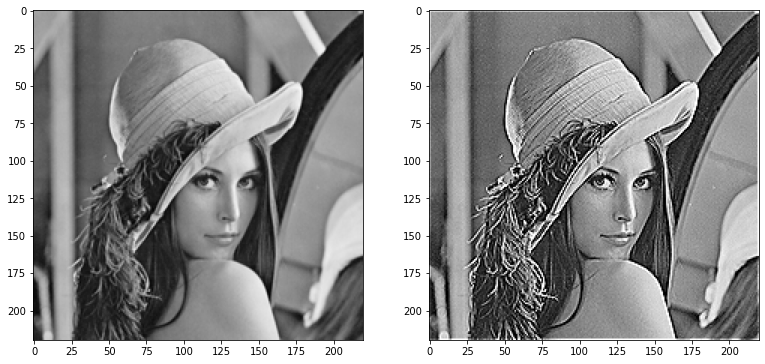

In [0]:
filter = tf.constant([0.0,-1, 0,
                       -1,5,-1, 
                       0,-1, 0], shape=(3,3,1,1))
conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c = sess.run(conv)
c = c[0,:,:,0]

c[c > 255] = 255
c[c < 0] = 0

plt.figure(figsize=(13,13))
plt.subplot(121)
plt.imshow(data, cmap='gray')
plt.subplot(122)
plt.imshow(c, cmap='gray')
#원본영상보다 원본이 엣지가 강조되어 출력.
#필터에 따라 다른 영상이 출력될 수 있음.

(4, 40000)


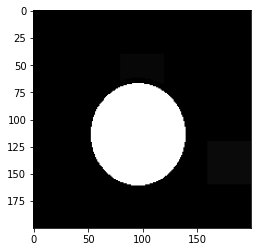

In [0]:
#2차원 영상 데이터를 1차원으로 변환하고, 전체 데이터를 하나의 2차원 행렬로 구성.
#이렇게 만들어진 데이터는 행은 전체 데이터의 개수, 열은 전체 영상의 크기.
#일반적으로 신경망은 이런 형식으로 데이터를 구성.

 
images = ['/content/drive/My Drive/files/원1.png', '/content/drive/My Drive/files/원2.png','/content/drive/My Drive/files/세모1.png', '/content/drive/My Drive/files/네모1.png']

datas = [] #1차원으로 변환될 전체 영상 데이터를 저장할 공간.
for i in range(len(images)) : 
    img = Image.open(  images[i]   ).convert('L')
    data = np.array( img, dtype='uint8' ) / 255.0
    datas.append(data.flatten())#flatten함수로 2차원 데이터를 1차원으로 변환.
    
datas = np.array(datas)   
print(datas.shape)

#1차원 벡터를 2차원 행렬로 다시 변환
img = datas[0, :].reshape(200,200)
plt.imshow(img     , cmap='gray') 

(4, 200, 200, 3)


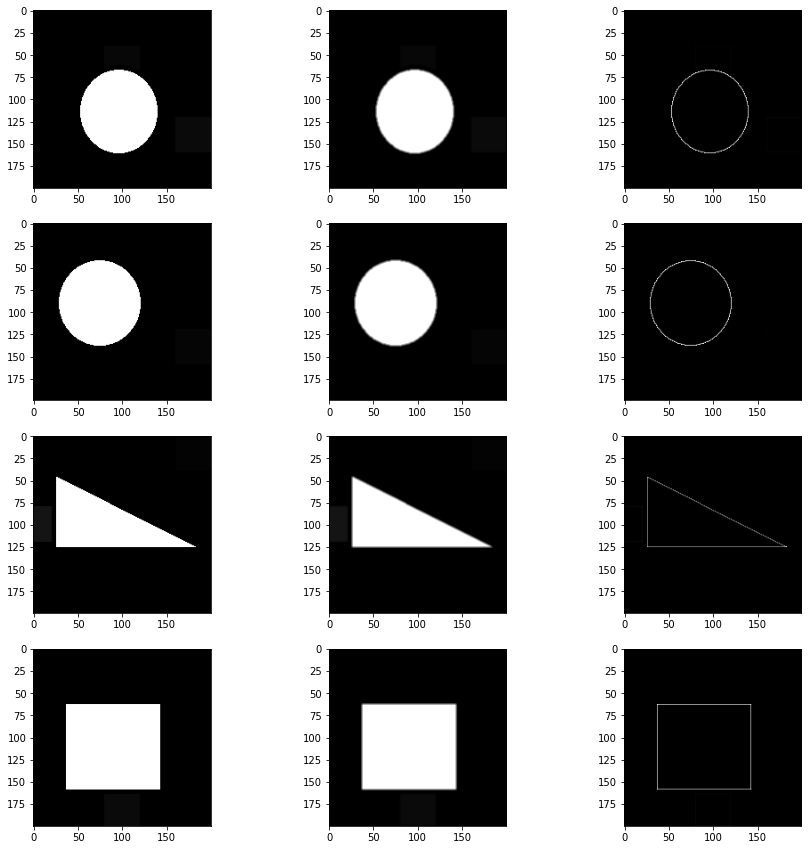

In [0]:
#1차원으로 변환된 영상 데이터를 convolution 필터에 적용
x = tf.placeholder("float", shape=[None, 40000]) #실제 데이터를 담음. shape에서 행을 의미하는 none은 영상의 갯수
#열은 가로와 세로를 곱한 40000 

#1차원을 2차원으로 바꾸어 x_image에 저장.
x_image = tf.reshape(x, [-1,200,200,1])    #-1은 none을 의미

f = np.zeros([3,3,1,3], dtype='float32')

f[:,:,0,0] =  np.array([0.0, 0,0,  0,1,0, 0,0,0]).reshape(3,3) #항등필터 : 필터링 결과 원본과 같음
f[:,:,0,1] =  np.array([1./9, 1./9, 1./9,   1./9, 1./9, 1./9, 1./9, 1./9, 1./9]).reshape(3,3) #평균필터 : 필터링 결과 블러링된 영상 출력
f[:,:,0,2] =  np.array([-1, -1, -1, -1, 8, -1, -1, -1, -1.0]).reshape(3,3)#외곽선을 추출.

filter = tf.constant(f, shape=(3,3,1,3)) 

#conv2d로 필터링 하는 식을 정의하여 conv에 저장.
#(입력데이터, 필터데이터, 전체데이터에 대에 x축과 y축으로 1칸씩 이동., padding을 사용->원본 데이터 크기 유지)
conv = tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME')

c = sess.run(conv, feed_dict={x:datas}) #placehold x에 데이터를 공급.

print(c.shape)

plt.figure(figsize=(15,15))
for i  in range(12) :
    plt.subplot(4,3,i+1)
    
    out = c[int(i / 3), :,:, i%3]    
    out[out > 255] = 255
    out[out < 0] = 0      
    
    
    plt.imshow(out, cmap='gray')